# 필사
## 링크
https://www.kaggle.com/code/arthurtok/interactive-porto-insights-a-plot-ly-tutorial/notebook
## 내용정리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')
from typing import List

In [2]:
train = pd.read_csv("../input/porto-seguro-safe-driver-prediction/train.csv")
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
import matplotlib.pyplot as plt
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


# 1.Data Quality checks

## null or missing values check

현재 데이터에는 null값이 -1로 설정되어 있다. 이를 `missingno`를 이용해 시각화하기 위해 `np.NaN`으로 replace해준다

In [5]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

In [6]:
def visualize_features(df: pd.DataFrame, start_idx: int, end_idx: int):
    msno.matrix(df=df.iloc[:, start_idx: end_idx], figsize=(20, 14), color=(0.42, 0.1, 0.05))

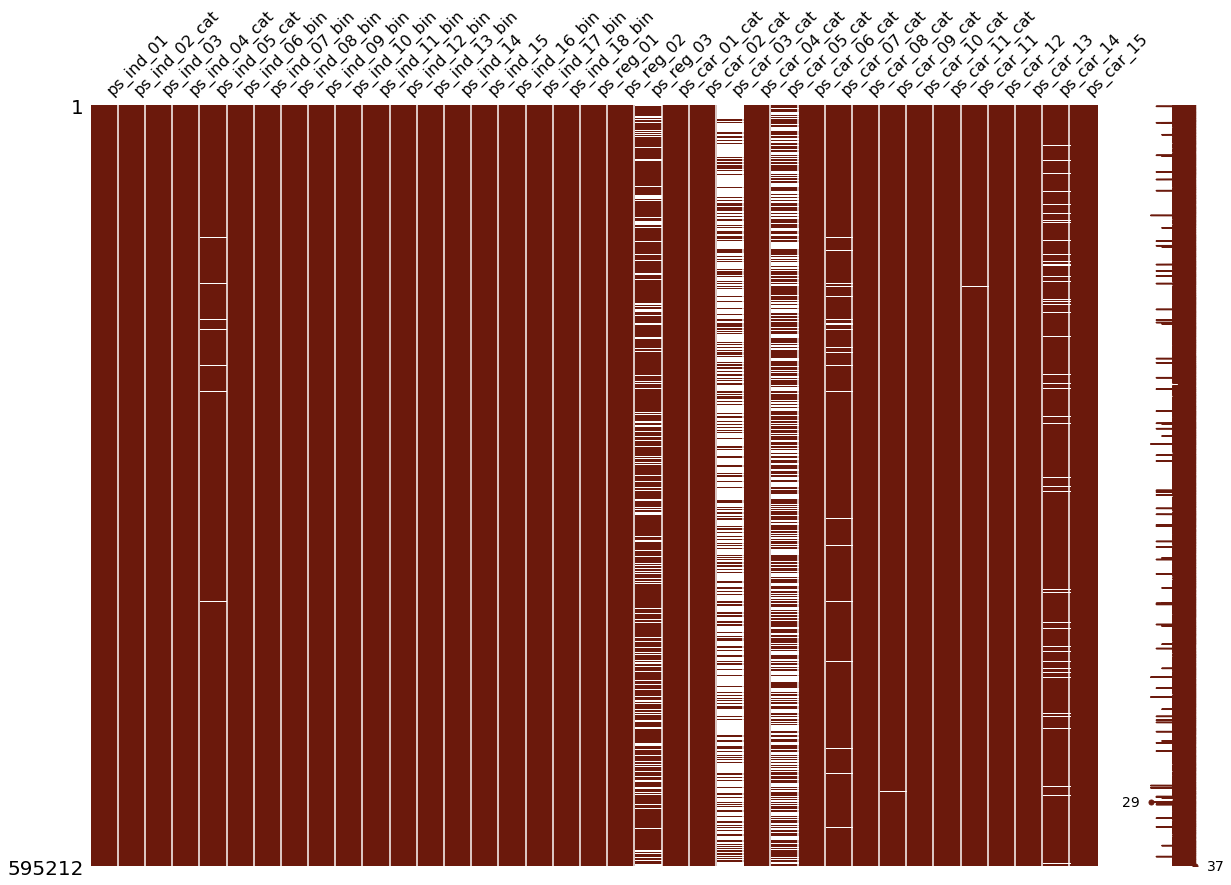

In [7]:
import missingno as msno
# Nullity or missing values by columns
visualize_features(train_copy, 2, 39)

In [8]:
def barplot_plotly(df: pd.DataFrame, feature: str = 'target'):
    data = [go.Bar(
            x = df[feature].value_counts().index.values,
            y = df[feature].value_counts().values,
            text=f'Distribution of {feature} variable'
    )]

    layout = go.Layout(
        title=f'{feature} variable distribution'
    )

    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename=f'basic-bar: {feature}')

In [9]:
barplot_plotly(train)

## Datatype check

파이썬의 `collections.Counter` 모듈을 사용하면 데이터 타입의 개수를 쉽게 확인할 수 있다.

In [10]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [11]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

In [12]:
def corr_heatmap(df: pd.DataFrame, features: List[str] = None):
    
    if features:
        correlations = df[features].corr()
    else:
        correlations = df.corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.title('Pearson correlation of continuous features', y=1.05, size=15)
    plt.show();

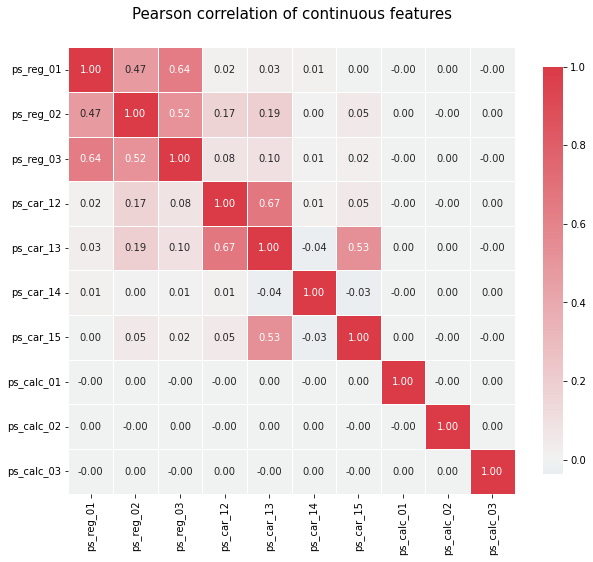

In [13]:
corr_heatmap(train_float)

## correlation map with plot.ly

In [14]:
#train_int = train_int.drop(["id", "target"], axis=1)
# colormap = plt.cm.bone
# plt.figure(figsize=(21,16))
# plt.title('Pearson correlation of categorical features', y=1.05, size=15)
# sns.heatmap(train_cat.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
data = [
    go.Heatmap(
        z=train_int.corr().values,
        x=train_int.columns.values,
        y=train_int.columns.values,
        colorscale='Viridis',
        reversescale = False,
        #text = True ,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    title_x=0.5)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

## mutual information plots

In [15]:
mf = mutual_info_classif(train_float.values, train.target.values, n_neighbors=3, random_state=17 )
print(mf)

[0.01402035 0.00431986 0.0055185  0.00778454 0.00157233 0.00197537
 0.01226    0.00553038 0.00545101 0.00562139]


## Binary features inspection

binary 데이터의 경우 0을 갖는 값과 1을 갖는 값을 누적해서 저장한 후 bar plot을 통해 시각화해주면 각 특징 당 분포를 보기 용이해진다.

In [16]:
def barplot_binary_plotly(df: pd.DataFrame):
    """
    visualize distribution of 0 and 1 values for each binary features
    
    df(pd.DataFrame): dataframe consist of binary features
    """
    
    zero_list = []
    one_list = []
    for col in df.columns:
        zero_list.append((train[col]==0).sum())
        one_list.append((train[col]==1).sum())
        
    trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
    )
    trace2 = go.Bar(
        x=bin_col,
        y=one_list,
        name='One count'
    )

    data = [trace1, trace2]
    layout = go.Layout(
        barmode='stack',
        title='Count of 1 and 0 in binary variables'
    )

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='stacked-bar')

In [17]:
bin_col = [col for col in train.columns if '_bin' in col]

barplot_binary_plotly(train[bin_col])

ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin이 대부분 0으로 구성되어 있는 것을 확인할 수 있다.

## Categorical and Ordinal feature inspection

## Feature importance via random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(train.drop(['id', 'target'],axis=1), train.target)
features = train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


### Plot.ly scatter plot of feature importances

In [19]:
def scatter_plotly(x: List[str], y: List[float], title: str = "title", ylabel: str = "ylabel"):
    trace = go.Scatter(
        y = y,
        x= x,
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            sizeref = 1,
            size = 13,
            color = y,
            colorscale='Portland',
            showscale=True
    ),
    text = x
        )
    
    data = [trace]
    
    layout= go.Layout(
        autosize= True,
        title= title,
        title_x=0.5,
        hovermode= 'closest',
        xaxis= dict(
            ticklen= 5,
            showgrid=False,
            zeroline=False,
            showline=False
        ),
        
        yaxis=dict(
            title= ylabel,
            showgrid=False,
            zeroline=False,
            ticklen= 5,
            gridwidth= 2
        ),
        showlegend= False
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='scatter')

In [20]:
scatter_plotly(features, rf.feature_importances_, title="rf feature importance", ylabel="feature importances")

In [21]:
def barh_plotly(x: List[str], y: List[float], title:str = "title"):

    trace = go.Bar(
        x=x ,
        y=y,
        marker=dict(
            color=x,
            colorscale = 'Viridis',
            reversescale = True
        ),
        name='Random Forest Feature importance', 
    )

    layout = dict(
        title=title,
         width = 900, height = 2000,
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
    #         domain=[0, 0.85],
        ))

    fig = go.Figure(data=[trace])
    fig['layout'].update(layout)
    py.iplot(fig, filename='plots')

In [22]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), reverse = False)))
barh_plotly(x=x, y=y, title='Barplot of Feature importances')

### Decision tree visualization

In [23]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

In [24]:
def visualize_tree(train_df):
    """
    train simple decision tree classifier and visualize the result
    """
    decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
    decision_tree.fit(train_df.drop(['target'],axis=1), train_df.target)
    # Export our trained model as a .dot file
    with open("tree1.dot", 'w') as f:
        f = tree.export_graphviz(decision_tree,
                                  out_file=f,
                                  max_depth = 3 + 1,
                                  impurity = False,
                                  feature_names = train_df.drop(['target'],axis=1).columns.values,
                                  class_names = ['No', 'Yes'],
                                  rounded = True,
                                  filled= True )
        #Convert .dot to .png to allow display in web notebook
    check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

    # Annotating chart with PIL
    img = Image.open("tree1.png")
    draw = ImageDraw.Draw(img)
    img.save('sample-out.png')
    PImage("sample-out.png",)

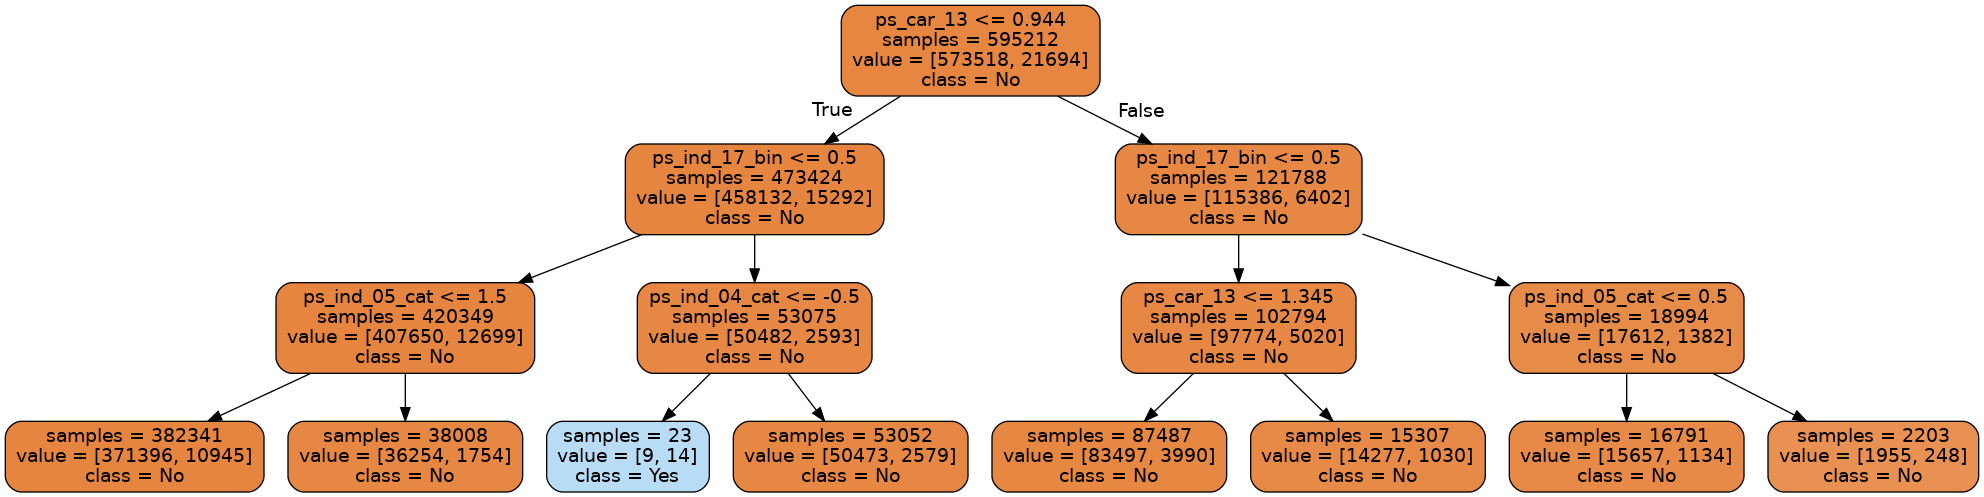

In [25]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(train.drop(['id', 'target'],axis=1), train.target)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3 + 1,
                              impurity = False,
                              feature_names = train.drop(['id', 'target'],axis=1).columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png",)

## Feature importances bia gradient boost

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_leaf=4, max_features=0.2, random_state=0)
gb.fit(train.drop(['id', 'target'],axis=1), train.target)
features = train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


In [27]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), reverse = False)))
barh_plotly(x=x, y=y, title='Barplot of Feature importances gradient boost')

In [28]:
scatter_plotly(features, gb.feature_importances_, title="gb feature importance", ylabel="feature importances")